Goal: exploring feature reduction on a Face Recognition Dataset

Face classification dataset: http://vis-www.cs.umass.edu/lfw/

- Images of well-known people
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [1]:
# From anaconda: install pillow
from sklearn.datasets import fetch_lfw_people

lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is depreca

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds02\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is

In [2]:
n_samples, height, width = lfw.images.shape
print('number of images', n_samples)
print('height (pixels)', height)
print('width (pixels)', width)

number of images 1288
height (pixels) 50
width (pixels) 37


In [3]:
print('labels', lfw.target_names)

print('y', lfw.target.shape, lfw.target)

print('X', lfw.data.shape, lfw.data)

labels ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
y (1288,) [5 6 3 ... 5 3 5]
X (1288, 1850) [[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


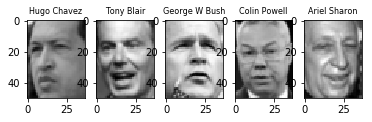

In [14]:
# plot images to see dataset

import matplotlib.pyplot as plt
num = 5

images = lfw.data[:5] # first 5 images (X)
targets = lfw.target[:5] # first 5 targets (y)

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

# for i in range(num):
#   axes[i].imshow(images[i])
#

for image, target, ax in zip(images, targets, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)
    ax.set_title(lfw.target_names[target], size=8)
    # ax.axis('off')
    
plt.show()

In [25]:
# PCA to map X to Z for training

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = lfw.data
y = lfw.target

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit using training set
pca = PCA(n_components=150)
pca.fit(X_train) # compute eigenvectors / eigenvalues

eigenfaces = pca.components_

# transform train and test


array([[-0.00685201, -0.00752687, -0.00918899, ..., -0.014338  ,
        -0.01294205, -0.01188307],
       [ 0.02304093,  0.02155212,  0.02275395, ..., -0.04400186,
        -0.04318579, -0.04226121],
       [ 0.02187864,  0.02016287,  0.01900918, ...,  0.05723412,
         0.05080724,  0.04725165],
       ...,
       [ 0.04827986,  0.01300851,  0.01280708, ...,  0.086404  ,
         0.04432933,  0.02442091],
       [-0.0720017 , -0.02008746,  0.01706021, ...,  0.03035345,
         0.02528251, -0.05049159],
       [ 0.0429724 ,  0.00216193, -0.02465147, ...,  0.02678664,
         0.05333984,  0.00624633]], dtype=float32)

In [40]:
eigenfaces.shape

(150, 1850)

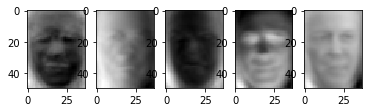

In [32]:
# plot the faces (eigenvectors)
eigenfaces = pca.components_

num = 5

# note: last 5, do eigenfaces[-num:]
images = eigenfaces[:num] # first 5 eigenvectors

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)

plt.show()

In [47]:
temp = eigenfaces[0].reshape(height, width)
temp[25:40, 10:25] # row, column

array([[-0.0248782 , -0.02467438, -0.02452624, -0.02305413, -0.02087047,
        -0.02029105, -0.02008202, -0.01951728, -0.01932691, -0.01960986,
        -0.02018775, -0.02067441, -0.02173949, -0.02383477, -0.02586988],
       [-0.02583147, -0.02527109, -0.02474277, -0.02288166, -0.02134037,
        -0.02115586, -0.0207752 , -0.01987745, -0.02043603, -0.02101303,
        -0.02133691, -0.0218568 , -0.02279216, -0.02458048, -0.02685459],
       [-0.02662862, -0.02633284, -0.02522705, -0.02341738, -0.02306828,
        -0.02318049, -0.02206358, -0.02122841, -0.02214615, -0.02268805,
        -0.0230915 , -0.02405552, -0.0249795 , -0.02571442, -0.02744399],
       [-0.02757865, -0.02735878, -0.02589585, -0.0244268 , -0.02438701,
        -0.02459551, -0.02407887, -0.02404669, -0.02493102, -0.02554793,
        -0.02625507, -0.02642303, -0.02682366, -0.02629862, -0.02721156],
       [-0.02740657, -0.0269765 , -0.02639032, -0.02641588, -0.02634607,
        -0.02602519, -0.02650296, -0.02781516, 

In [53]:
print(pca.explained_variance_)

[501418.4     391794.62    183592.95    154257.33    133670.98
  74828.57     65169.8      56409.01     52337.727    49298.75
  43599.15     40965.516    31706.82     28196.893    27588.203
  25390.406    23128.988    22155.65     21659.766    18729.107
  18053.525    16946.484    16575.908    14548.068    13765.105
  13481.173    13152.378    12549.6045   11496.804    10829.192
  10203.937     9893.543     9228.295     9102.332     8670.93
   8551.058     8154.396     7677.2764    7519.656     7379.3643
   7257.0737    6934.43      6736.043     6697.1587    6244.08
   6194.189     6101.124     5768.96      5637.3037    5612.902
   5418.4697    5324.1763    5194.467     5116.0483    5023.64
   4892.332     4669.669     4636.618     4530.925     4485.164
   4293.187     4223.2314    4079.6963    3976.536     3886.7576
   3816.7021    3730.3696    3677.2634    3620.637     3580.4229
   3473.1172    3451.4124    3338.5227    3255.1355    3220.2092
   3158.4243    3134.6995    3066.2014   

In [54]:
print(pca.explained_variance_ratio_)

[0.19346525 0.15116845 0.07083676 0.05951802 0.05157507 0.02887155
 0.02514485 0.02176462 0.02019378 0.01902123 0.01682212 0.01580597
 0.01223363 0.01087938 0.01064452 0.00979653 0.008924   0.00854845
 0.00835712 0.00722636 0.0069657  0.00653856 0.00639558 0.00561317
 0.00531107 0.00520152 0.00507466 0.00484209 0.00443588 0.00417829
 0.00393705 0.00381728 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290135 0.00284722 0.00280004 0.00267555
 0.00259901 0.002584   0.00240919 0.00238994 0.00235403 0.00222587
 0.00217507 0.00216566 0.00209064 0.00205426 0.00200421 0.00197396
 0.0019383  0.00188764 0.00180173 0.00178897 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139697 0.00138146 0.00134005 0.00133168
 0.00128812 0.00125595 0.00124247 0.00121863 0.00120948 0.00118305
 0.00115091 0.00113677 0.00112622 0.0011162  0.00109399 0.0010718
 0.00105666 0.0010436  0.00102393 0.00101695 0.00099771 0.00096

In [36]:
# eigenvalues-equivalent (explained_variance)
# print(pca.explained_variance_)

import numpy as np
# 95.7% of the variance is captured by projecting from 1850 to 150 features 
print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.9567006
[0.19346525 0.15116845 0.07083676 0.05951802 0.05157507 0.02887155
 0.02514485 0.02176462 0.02019378 0.01902123 0.01682212 0.01580597
 0.01223363 0.01087938 0.01064452 0.00979653 0.008924   0.00854845
 0.00835712 0.00722636 0.0069657  0.00653856 0.00639558 0.00561317
 0.00531107 0.00520152 0.00507466 0.00484209 0.00443588 0.00417829
 0.00393705 0.00381728 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290135 0.00284722 0.00280004 0.00267555
 0.00259901 0.002584   0.00240919 0.00238994 0.00235403 0.00222587
 0.00217507 0.00216566 0.00209064 0.00205426 0.00200421 0.00197396
 0.0019383  0.00188764 0.00180173 0.00178897 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139697 0.00138146 0.00134005 0.00133168
 0.00128812 0.00125595 0.00124247 0.00121863 0.00120948 0.00118305
 0.00115091 0.00113677 0.00112622 0.0011162  0.00109399 0.0010718
 0.00105666 0.0010436  0.00102393 0.00101695 0.000997

50 : 0.8630372
100 : 0.9282824
150 : 0.95670223
200 : 0.97214746
250 : 0.9815224


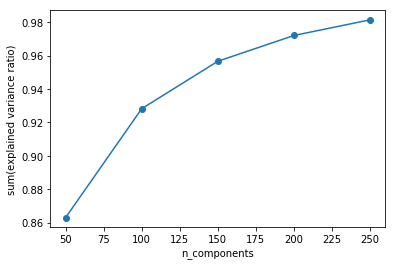

In [39]:
components = range(50, 300, 50)
evrs = []

for n in components:
    pca_temp = PCA(n_components=n)
    pca_temp.fit(X_train) # notice that PCA is unsupervised

    # compute sum of ratios (e.g. 0.95, etc)
    evr = np.sum(pca_temp.explained_variance_ratio_)
    evrs.append(evr)
    print(n, ':', evr)
    
fig, ax = plt.subplots()
ax.plot(components, evrs, marker='o')
ax.set(xlabel='n_components', ylabel='sum(explained variance ratio)')
plt.show()

In [42]:
# plot the transformed "images"
Z_train = pca.transform(X_train) # Z_train = e . X_train'
Z_test = pca.transform(X_test)

print('Train set after PCA', Z_train.shape)
print('Test set after PCA', Z_test.shape)

Train set after PCA (966, 150)
Test set after PCA (322, 150)


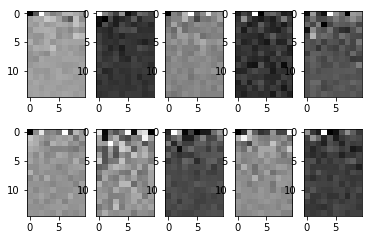

In [52]:
nrows=2
ncols=5

num = nrows * ncols
z_height = 15 # arbitrary (just for plotting)
z_width = 10

images = Z_train[:num] # first 5 transformed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(z_height, z_width), cmap=plt.cm.gray) 
plt.show()